In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)
X

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [ ]:
y=pd.DataFrame(housing.target,columns=['target'])
y

target
0       4.526
1       3.585
2       3.521
3       3.413
4       3.422
...       ...
20635   0.781
20636   0.771
20637   0.923
20638   0.847
20639   0.894

[20640 rows x 1 columns]

In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_test.shape)

(15480, 8)
(15480, 1)
(5160, 8)
(3870, 8)
(5160, 1)


In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
import tensorflow as tf

LAYERS=[
    tf.keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1)
]

In [ ]:
model=tf.keras.Sequential(LAYERS)
model

In [ ]:
LOSS="mse"
OPTIMISER="sgd"
model.compile(optimizer=OPTIMISER,loss=LOSS)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_valid=scalar.transform(X_valid)
X_test=scalar.transform(X_test)

In [ ]:
EPOCHS=50
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2882 - val_loss: 0.2831
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2851 - val_loss: 0.2806
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2840 - val_loss: 0.2806
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2865 - val_loss: 0.2831
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2835 - val_loss: 0.5368
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2861 - val_loss: 0.2940
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2855 - val_loss: 0.2972
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2853 - val_loss: 0.2922
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2834 - val_loss: 0.2786
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2819 - val_loss: 0.2792

In [ ]:
pd.DataFrame(history.history)

loss  val_loss
0   0.288197  0.283116
1   0.285108  0.280616
2   0.283956  0.280640
3   0.286520  0.283139
4   0.283537  0.536792
5   0.286142  0.293951
6   0.285457  0.297185
7   0.285263  0.292169
8   0.283382  0.278551
9   0.281917  0.279230
10  0.282174  0.278188
11  0.281713  0.284145
12  0.281757  0.304263
13  0.280194  0.297575
14  0.281708  0.281827
15  0.279719  0.323782
16  0.279227  0.307334
17  0.279168  0.285285
18  0.279698  0.281015
19  0.278797  0.276669
20  0.278097  0.289605
21  0.278406  0.279522
22  0.277606  0.276481
23  0.278369  0.280981
24  0.276677  0.279056
25  0.288770  0.873080
26  0.291701  0.276855
27  0.281004  0.274953
28  0.278464  0.279755
29  0.276896  0.275300
30  0.276280  0.275308
31  0.276145  0.282298
32  0.276277  0.272818
33  0.277104  0.274980
34  0.276274  0.272537
35  0.275524  0.275534
36  0.274095  0.281147
37  0.273798  0.271537
38  0.274420  0.276549
39  0.275169  0.272359
40  0.272423  0.272215
41  0.273075  0.368468
42  0.276936  0.272425
43  0.273962  0.274505
44  0.272042  0.274891
45  0.271869  0.277639
46  0.271551  0.271441
47  0.271543  0.270001
48  0.269776  0.280317
49  0.282764  0.282881

<Axes: >

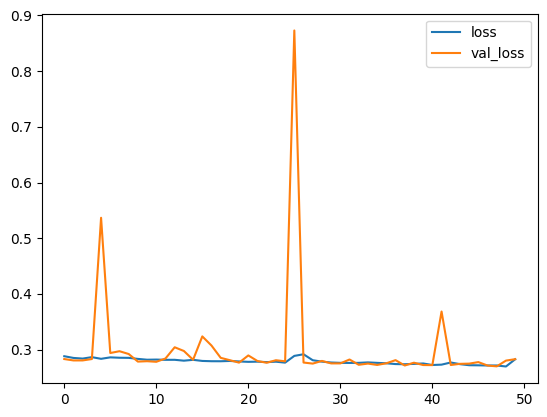

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.2966


0.2966436445713043

In [ ]:
new=X_test[0]
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [ ]:
new.shape

(8,)

In [ ]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [ ]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 102ms/step


array([[0.5219425]], dtype=float32)